In [1]:
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import os

test_fit = os.path.join('..', 'data', 'glg_tte_n7_bn090926181_v00.fit')

tte = TTE.open(test_fit)
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

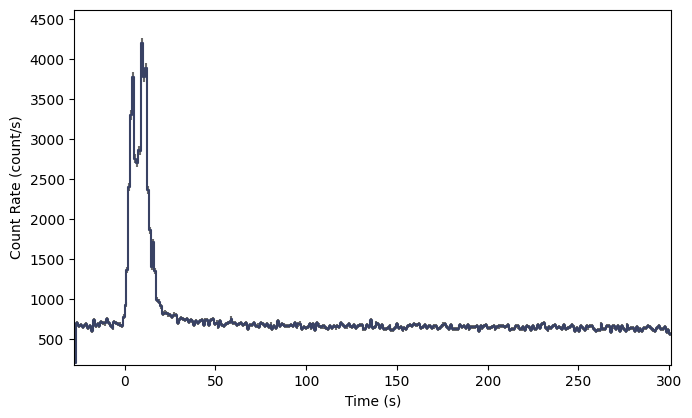

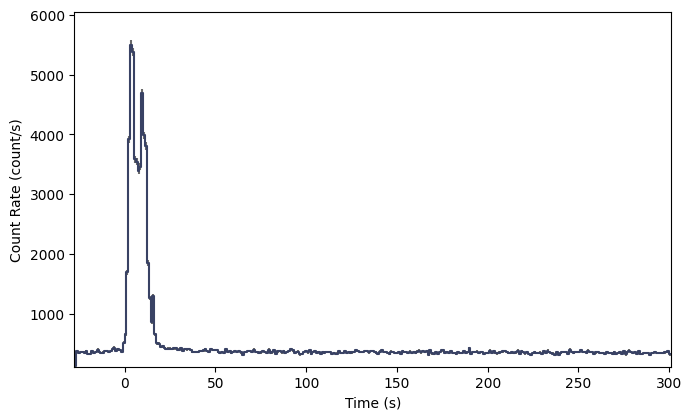

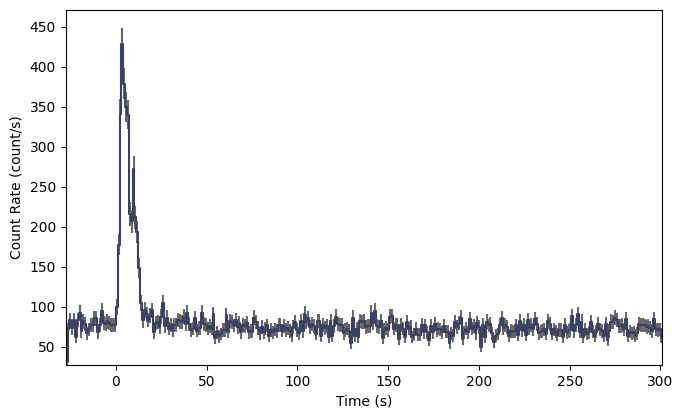

In [2]:
%matplotlib inline
from gbm.plot import Lightcurve

erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

lc_data1 = phaii.to_lightcurve(energy_range=erange1)
lcplot1 = Lightcurve(data=lc_data1)

lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lcplot2 = Lightcurve(data=lc_data2)

lc_data3 = phaii.to_lightcurve(energy_range=erange3)
lcplot3 = Lightcurve(data=lc_data3)

In [3]:
from gbm.data import Cspec, GbmDetectorCollection

test_pha = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.pha')
n7 = Cspec.open(test_pha)

cspecs = GbmDetectorCollection.from_list([n7])

In [25]:
view_range = (-20.0, 60.0)
bkgd_range = [(-20., -5.), (45., 100.)]
# src_range = (10.0, 13.0)
src_range = (19.0, 20.0)

In [26]:
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

backfitters = [BackgroundFitter.from_phaii(cspec, Polynomial, time_ranges=bkgd_range) for cspec in cspecs]
backfitters = GbmDetectorCollection.from_list(backfitters, dets=cspecs.detector())

backfitters.fit(order=1)

bkgds = backfitters.interpolate_bins(cspecs.data()[0].tstart, cspecs.data()[0].tstop)
bkgds = GbmDetectorCollection.from_list(bkgds, dets=cspecs.detector())

In [27]:
# the lightcurves
data_lcs = cspecs.to_lightcurve(energy_range=erange1)
# the energy-integrated background
bkgd_lcs = bkgds.integrate_energy(*erange1)
# the source time selection
src_lcs = cspecs.to_lightcurve(time_range=src_range, energy_range=erange1)

# the count spectrum
data_specs = cspecs.to_spectrum(time_range=src_range)
# the time-integrated background
bkgd_specs = bkgds.integrate_time(*src_range)
# the energy selection
src_specs = cspecs.to_spectrum(time_range=src_range, energy_range=erange1)

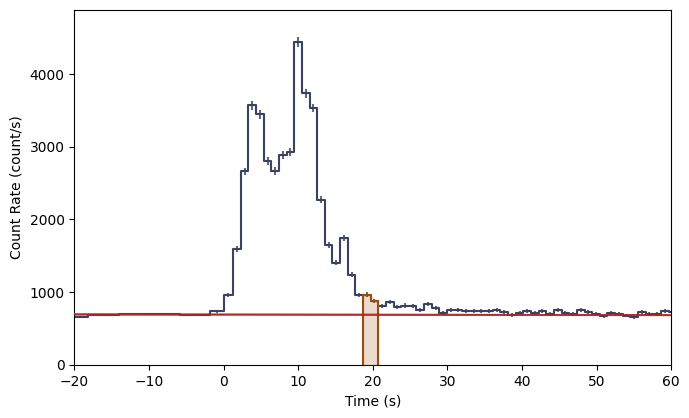

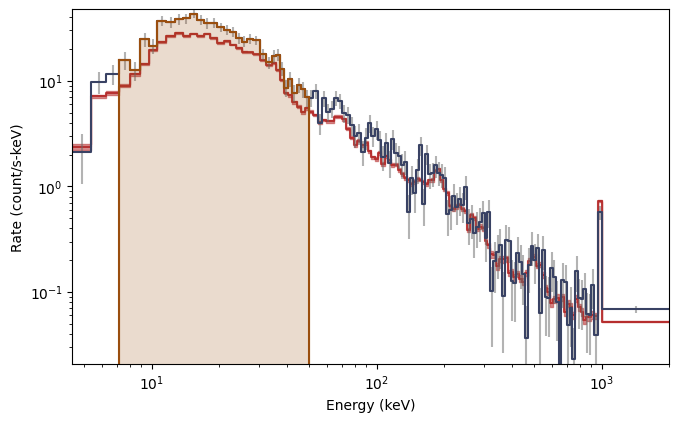

In [28]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

# Plot the lightcurves with the selections and background fit
lcplots = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs, bkgd_lcs)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots, src_lcs)]
# zoom in
for lcplot in lcplots:
    lcplot.xlim = view_range
 
# Plot the spectra with the selections and background fit
specplots = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots, src_specs)]

In [8]:
# src_range = (0, 20)    # our time selection
# erange_nai = (8.0, 900.0) # in keV
# erange_bgo = (325, 35000.0)

# i = 0

# """
# while(i < 20):
#     for j in range( i+1 , i+3):
        
#         intervalo = (i,j)
        
#         # realizar el fit con el sub intervalo
        
#         # if( error < 0.2 ):
#         #   i = j  
#         break
#  """



        
    


# test_fit2 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.rsp2')

# from gbm.data import RSP
# phas = cspecs.to_pha(time_ranges=src_range, nai_kwargs={'energy_range':erange_nai}, bgo_kwargs={'energy_range':erange_bgo})


# test_rps = RSP.open(test_fit2)
# rsps = GbmDetectorCollection.from_list([test_rps])

# rsps_interp = [rsp.interpolate(pha.tcent) for rsp, pha in zip(rsps, phas)]
# from gbm.spectra.fitting import SpectralFitterPgstat

# # we initialize with our PHAs, backgrounds, and responses:
# specfitter = SpectralFitterPgstat(phas, bkgds.to_list(), rsps.to_list(), method='TNC')
# from gbm.spectra.functions import PowerLaw, Comptonized, Band

# # instantiate a Band function
# band = Band()

# print('Band Fit:')
# specfitter.fit(band, options={'maxiter': 1000})

# # After the fit has converged, we can query the fitter for lots of info, including the parameters that
# # satisfy the maximum likelihood as well as the parameter uncertainties resulting from -2(Delta)LogLike
# print(specfitter.message)
# print('Parameters: {}'.format(specfitter.parameters))

# print('90% Asymm. Errors:\n {}'.format(specfitter.asymmetric_errors(cl=0.9)))
# print('Pgstat/DoF: {}/{}'.format(specfitter.statistic, specfitter.dof))


In [9]:
# errores = specfitter.asymmetric_errors(cl=0.9)
# errores2 = specfitter.parameters


# n1 = len(errores)

# for i in range(n1):
#     print(errores[i])

#     promedioI = (errores[i][0]+errores[i][1])/2
#     print(f"promedio del error {i+1} = {promedioI < 0.2 * errores2[i] }")

In [ ]:
from gbm.data import RSP
from gbm.spectra.fitting import SpectralFitterPgstat
from gbm.spectra.functions import PowerLaw, Comptonized, Band


erange_nai = (8.0, 900.0) # in keV
erange_bgo = (325, 35000.0)

test_fit2 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.rsp2')

i=0

while(i < 20):
    for j in range( i+1 , i+3):
        
        src_range = (i,j)
        phas = cspecs.to_pha(time_ranges=src_range, nai_kwargs={'energy_range':erange_nai}, bgo_kwargs={'energy_range':erange_bgo})

        test_rps = RSP.open(test_fit2)
        rsps = GbmDetectorCollection.from_list([test_rps])

        rsps_interp = [rsp.interpolate(pha.tcent) for rsp, pha in zip(rsps, phas)]

        specfitter = SpectralFitterPgstat(phas, bkgds.to_list(), rsps.to_list(), method='TNC')

        band = Band()
        
        specfitter.fit(band, options={'maxiter': 1000})

        errors = specfitter.asymmetric_errors(cl=0.9)
        parameters = specfitter.parameters

        n1 = len(errors)
        for i in range(n1):
            print(errors[i])
            promedioI = (errors[i][0]+errors[i][1])/2
            print(f"promedio del error {i+1} = {promedioI < 0.2 * parameters[i] }")
        # realizar el fit con el sub intervalo
        
        if(promedioI[0] < 0.2 * parameters[0] & promedioI[1] < 0.2 * parameters[1]):
            print(f"entro al if")
            i = j  
            break



In [ ]:
import os
from gbm.data import RSP, GbmDetectorCollection
from gbm.spectra.fitting import SpectralFitterPgstat
from gbm.spectra.functions import Band

# Definir rangos de energía
erange_nai = (8.0, 900.0) # keV
erange_bgo = (325, 35000.0)

# Ruta al archivo RSP2
test_fit2 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.rsp2')

i = 0
while i < 20:
    for j in range(i+1, i + 3):
        src_range = (i, j)

        # Crear objetos PHA
        phas = cspecs.to_pha(
            time_ranges=src_range,
            nai_kwargs={'energy_range': erange_nai},
            bgo_kwargs={'energy_range': erange_bgo}
        )

        # Cargar RSPs
        test_rps = RSP.open(test_fit2)
        rsps = GbmDetectorCollection.from_list([test_rps])

        # Interpolación de los RSPs
        rsps_interp = [rsp.interpolate(pha.tcent) for rsp, pha in zip(rsps, phas)]

        # Crear objeto de ajuste espectral
        specfitter = SpectralFitterPgstat(
            phas,
            bkgds.to_list(),
            rsps.to_list(),
            method='TNC'
        )

        # Seleccionar modelo Band y ajustar
        band = Band()
        specfitter.fit(band, options={'maxiter': 1000})

        # Obtener errores y parámetros
        errors = specfitter.asymmetric_errors(cl=0.9)
        parameters = specfitter.parameters

        # Evaluar si los errores son suficientemente pequeños
        all_small_errors = True
        for idx, (low_err, high_err) in enumerate(errors):
            promedio = (abs(low_err) + abs(high_err)) / 2
            param_val = abs(parameters[idx])
            cumple = promedio < 0.2 * param_val
            print(f"Parámetro {idx+1}: error promedio = {promedio:.4f}, "
                  f"20% del valor = {0.2 * param_val:.4f} → {'OK' if cumple else 'NO'}")
            if not cumple:
                all_small_errors = False

        if all_small_errors:
            print(f"Intervalo aceptado: ({i}, {j})")
            i = j  # Avanzar al final del subintervalo actual
            break
    else:
        # Si el for termina sin hacer break (no se encontró un buen fit)
        i += 1  # Avanzar solo un paso


In [39]:
import os
import numpy as np
from gbm.data import RSP, GbmDetectorCollection
from gbm.spectra.fitting import SpectralFitterPgstat
from gbm.spectra.functions import Band

# --- Configuración básica ---
erange_nai = (8.0, 900.0)      # keV
erange_bgo = (325.0, 35000.0)  # keV
test_fit2 = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.rsp2')

# --- Cargar respuesta instrumental ---
test_rsp = RSP.open(test_fit2)
rsps = GbmDetectorCollection.from_list([test_rsp])

intervals=[]
# --- Bucle principal ---
i = 0
while i < 20:
    success = False
    for j in range(i + 1, i + 3):
        src_range = (i, j)
        print(f"\n🔹 Intervalo: {src_range}")

        # Crear PHAs
        phas = cspecs.to_pha(
            time_ranges=src_range,
            nai_kwargs={'energy_range': erange_nai},
            bgo_kwargs={'energy_range': erange_bgo}
        )

        # Interpolar respuesta
        rsps_interp = [rsp.interpolate(pha.tcent) for rsp, pha in zip(rsps, phas)]

        # Crear ajustador espectral
        specfitter = SpectralFitterPgstat(
            phas,
            bkgds.to_list(),
            rsps_interp,
            method='TNC'
        )

        # Ajuste con modelo Band
        band = Band()

        try:
            specfitter.fit(band, options={'maxiter': 1000})
        except Exception as e:
            print(f"❌ Falló el ajuste en {src_range}: {e}")
            continue

        # Obtener parámetros y errores
        errors = specfitter.asymmetric_errors(cl=0.9)
        parameters = specfitter.parameters

        # Mostrar todos los parámetros
        for k, val in enumerate(parameters):
            low_err, high_err = errors[k]
            avg_err = (abs(low_err) + abs(high_err)) / 2
            if not np.isfinite(val):
                print(f"⚠️ Parámetro {k+1}: valor no finito ({val})")
            else:
                print(f"Parámetro {k+1}: valor = {val:.4g}, error promedio = {avg_err:.4g}")

        # --- Evaluar solo α y β ---
        parametros_importantes = [0, 2]
        all_small_errors = True

        for k in parametros_importantes:
            val = parameters[k]
            if not np.isfinite(val):
                print(f"❌ Parámetro {k+1} no finito → intervalo rechazado.")
                all_small_errors = False
                break

            low_err, high_err = errors[k]
            avg_err = (abs(low_err) + abs(high_err)) / 2
            cumple = avg_err < 0.2 * abs(val)

            print(f"Comparando parámetro {k+1}: Δ={avg_err:.4g}, "
                  f"20%·|θ|={0.2 * abs(val):.4g} → {'OK' if cumple else 'NO'}")

            if not cumple:
                all_small_errors = False

        # Decisión final
        if all_small_errors:
            intervals.append(src_range)
            print(f"✅ Intervalo aceptado: {src_range}")
            i = j+1
            success = True
            break

    if not success:
        i += 1




🔹 Intervalo: (0, 1)


/home/diego/.pyenv/versions/3.6.15/lib/python3.6/site-packages/gbm/spectra/fitting.py:370: UserWarning: Parameter exists at its lower bound
  warnings.warn("Parameter exists at its lower bound")
/home/diego/.pyenv/versions/3.6.15/lib/python3.6/site-packages/gbm/spectra/fitting.py:399: UserWarning: Parameter exists at its upper bound
  warnings.warn("Parameter exists at its upper bound")


Parámetro 1: valor = 0.01507, error promedio = 0.002436
Parámetro 2: valor = 302, error promedio = 77.44
Parámetro 3: valor = -0.6974, error promedio = 0.235
Parámetro 4: valor = -8.265, error promedio = 4
Comparando parámetro 1: Δ=0.002436, 20%·|θ|=0.003014 → OK
Comparando parámetro 3: Δ=0.235, 20%·|θ|=0.1395 → NO

🔹 Intervalo: (0, 2)
Parámetro 1: valor = 0.04755, error promedio = 0.002887
Parámetro 2: valor = 324.1, error promedio = 25.7
Parámetro 3: valor = -0.4745, error promedio = 0.09612
Parámetro 4: valor = -7.678, error promedio = 4
Comparando parámetro 1: Δ=0.002887, 20%·|θ|=0.009509 → OK
Comparando parámetro 3: Δ=0.09612, 20%·|θ|=0.0949 → NO

🔹 Intervalo: (1, 2)
Parámetro 1: valor = 0.07473, error promedio = 0.004239
Parámetro 2: valor = 354.9, error promedio = 28.43
Parámetro 3: valor = -0.5125, error promedio = 0.08679
Parámetro 4: valor = -8.532, error promedio = 4
Comparando parámetro 1: Δ=0.004239, 20%·|θ|=0.01495 → OK
Comparando parámetro 3: Δ=0.08679, 20%·|θ|=0.1025 → 

/home/diego/.pyenv/versions/3.6.15/lib/python3.6/site-packages/gbm/spectra/functions.py:507: RuntimeWarning: overflow encountered in double_scalars
  e0 = Epeak / (2.0 + alpha)
/home/diego/.pyenv/versions/3.6.15/lib/python3.6/site-packages/gbm/spectra/fitting.py:386: RuntimeWarning: overflow encountered in double_scalars
  maxval = 2.0 * param


Parámetro 1: valor = 0.004658, error promedio = 0.0009989
Parámetro 2: valor = 1.287e+05, error promedio = inf
Parámetro 3: valor = -1.863, error promedio = 0.1058
Parámetro 4: valor = -2, error promedio = 4
Comparando parámetro 1: Δ=0.0009989, 20%·|θ|=0.0009316 → NO
Comparando parámetro 3: Δ=0.1058, 20%·|θ|=0.3726 → OK

🔹 Intervalo: (19, 21)
Parámetro 1: valor = 0.004474, error promedio = 0.0008863
Parámetro 2: valor = 575.5, error promedio = inf
Parámetro 3: valor = -1.789, error promedio = 0.1372
Parámetro 4: valor = -2, error promedio = 4
Comparando parámetro 1: Δ=0.0008863, 20%·|θ|=0.0008948 → OK
Comparando parámetro 3: Δ=0.1372, 20%·|θ|=0.3578 → OK
✅ Intervalo aceptado: (19, 21)


In [41]:
print(intervals)

# for (a, b) in intervalos:
#     mask = (x >= a) & (x < b)
#     x_sub = x[mask]
#     y_sub = y[mask]
    
#     params, cov = curve_fit(modelo_band, x_sub, y_sub, p0=inicial)
    
#     resultados.append({
#         "intervalo": (a, b),
#         "parametros": params,
#         "errores": np.sqrt(np.diag(cov))
#     })

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14), (15, 16), (17, 18), (19, 21)]
